# Galaxy Tracker

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from auriga.images import add_redshift, figure_setup
from auriga.paths import Paths
from auriga.parser import parse

In [7]:
figure_setup()

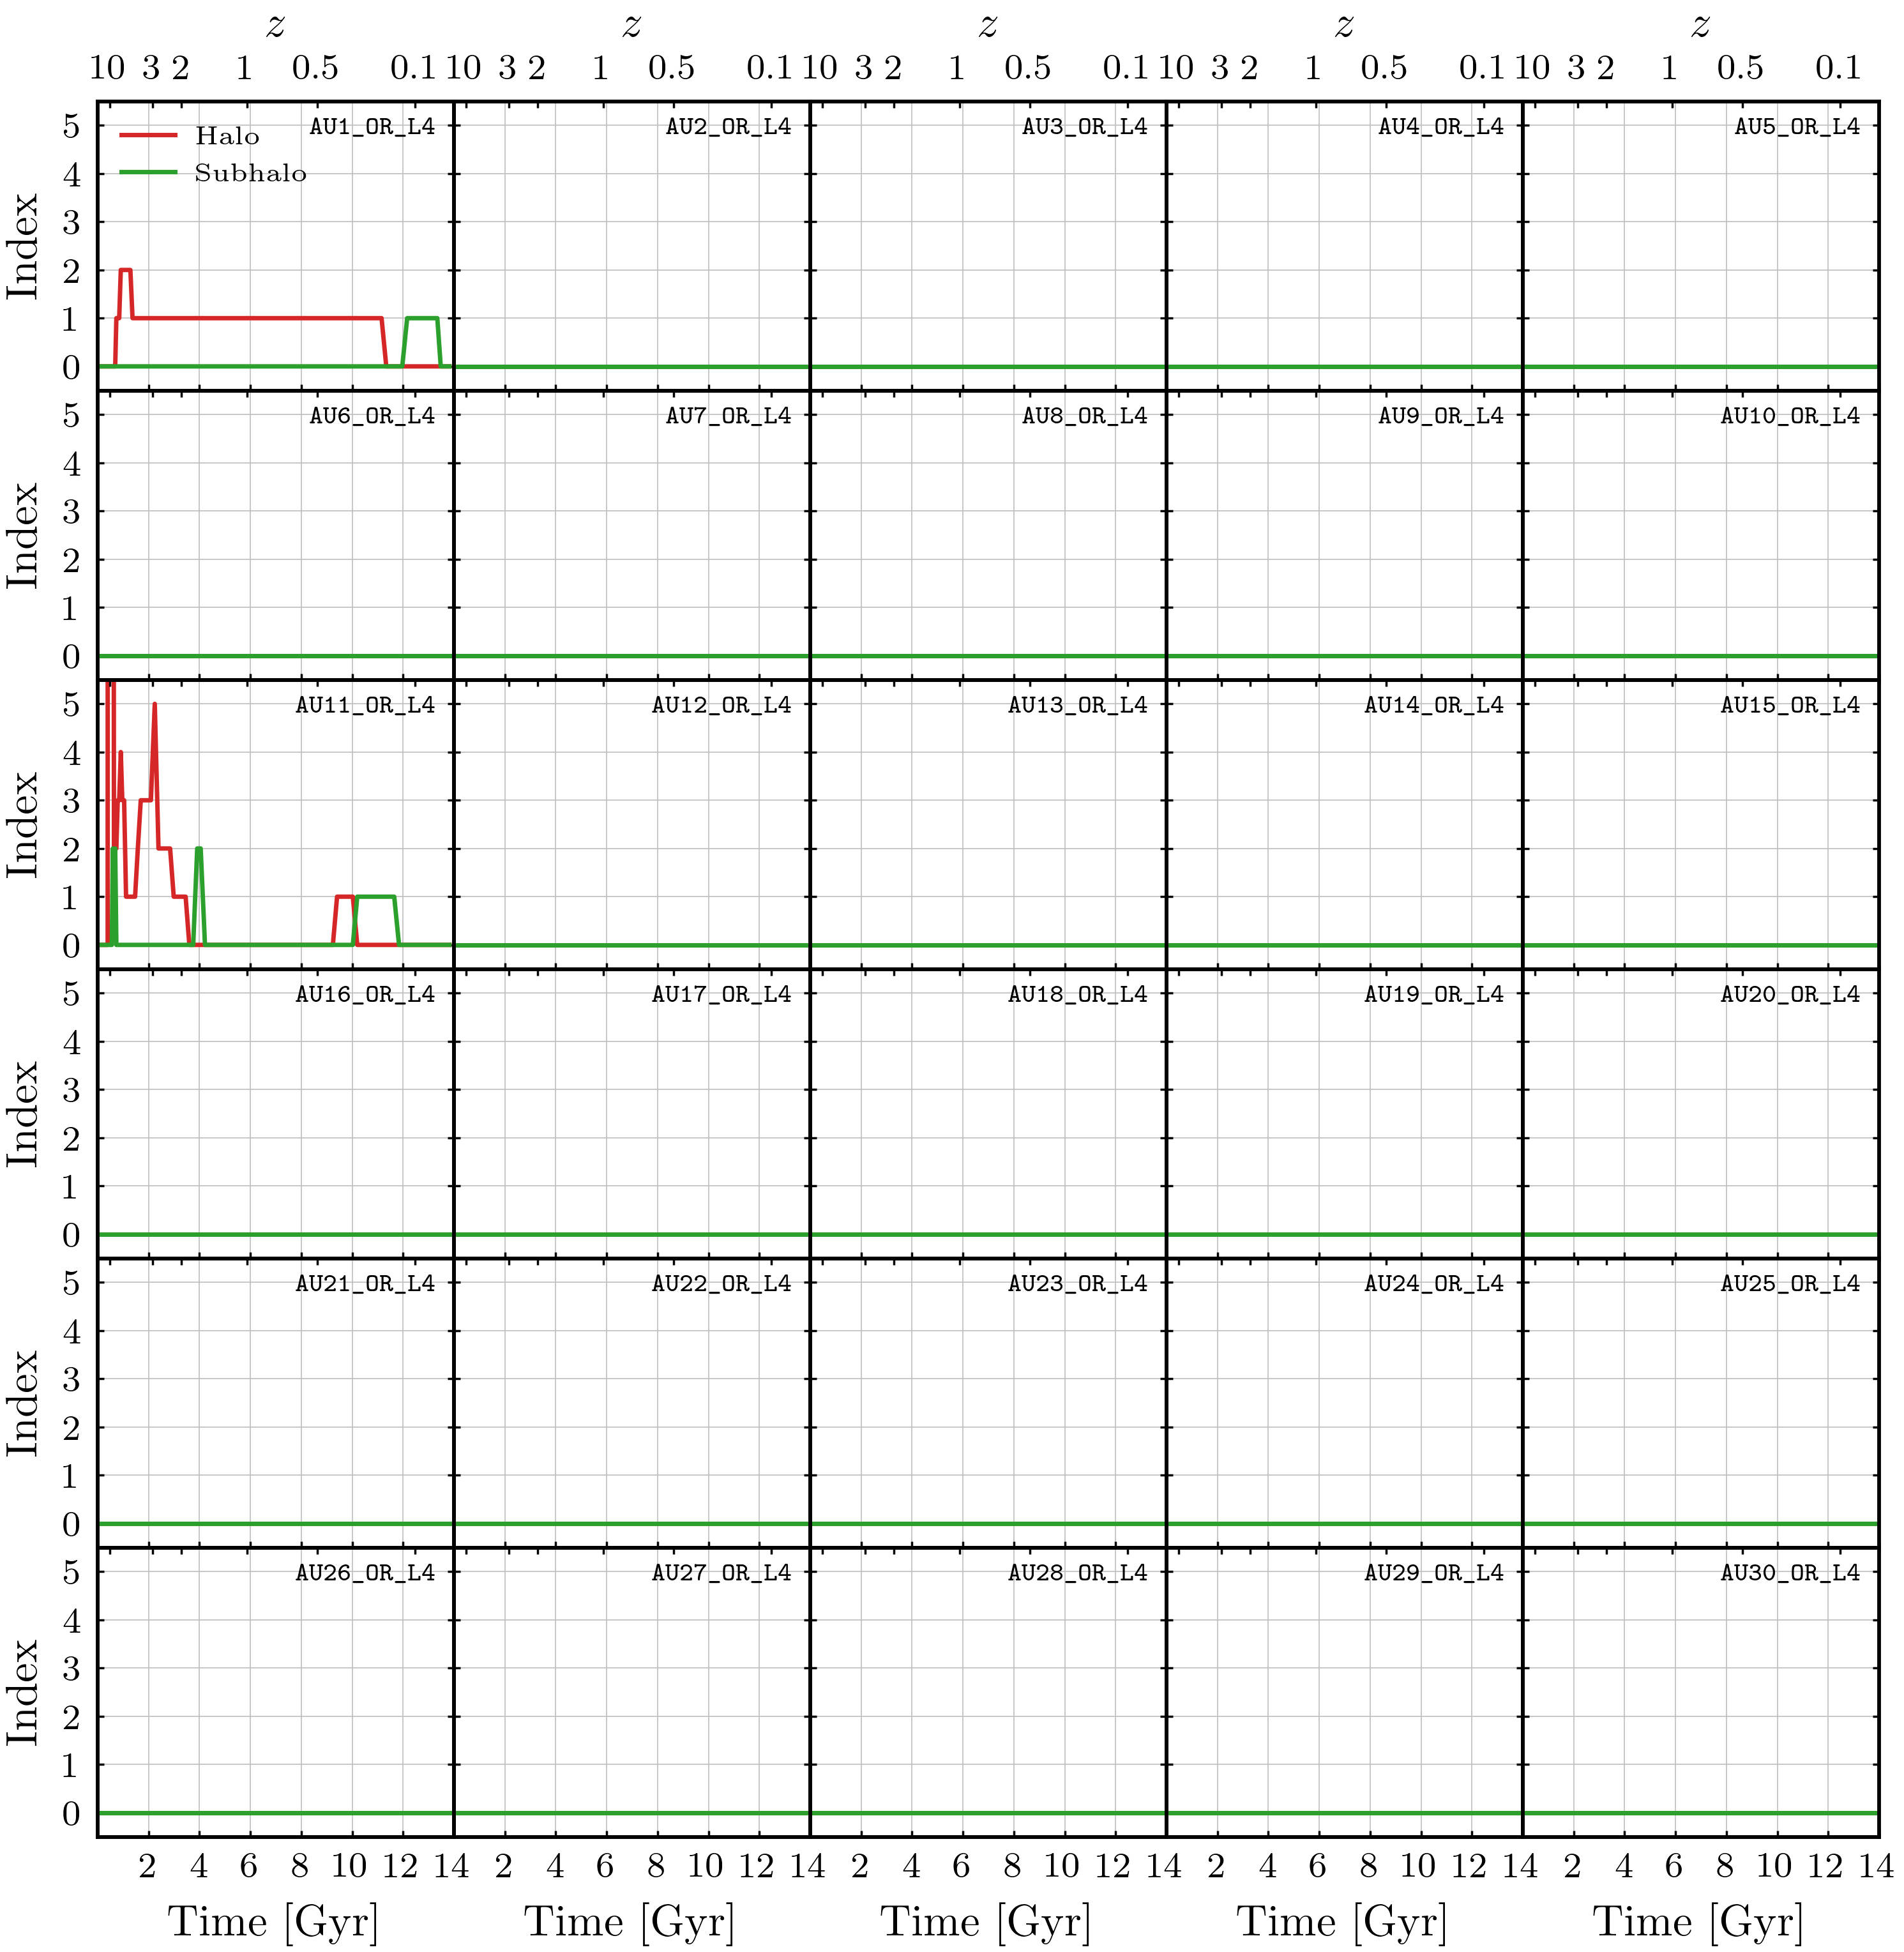

In [13]:
# TODO: Transform this cell into a method that takes a list of galaxies
#  and fix labels.

fig = plt.figure(figsize=(7.2, 7.2))
gs = fig.add_gridspec(nrows=6, ncols=5, hspace=0.0, wspace=0.0)
axs = gs.subplots(sharex=True, sharey=True)

for ax_idx, ax in enumerate(axs.flat):
    ax.label_outer()
    ax.grid(True, ls='-', lw=0.25, c='silver')
    ax.tick_params(which='both', direction="in")
    ax.set_xlim(0, 14)
    ax.set_ylim(-0.5, 5.5)
    ax.set_xticks([2, 4, 6, 8, 10, 12, 14])
    ax.set_yticks([0, 1, 2, 3, 4, 5])

    galaxy = ax_idx + 1

    paths = Paths(galaxy, False, 4)
    df = pd.read_csv(f"../{paths.results}temporal_data.csv")
    ax.plot(df["Time_Gyr"], df["MainHaloIdx"],
            c='tab:red', lw=1.0, label='Halo', zorder=10)
    ax.plot(df["Time_Gyr"], df["MainSubhaloIdx"],
            c='tab:green', lw=1.0, label='Subhalo', zorder=11)

    if galaxy == 1:
        ax.legend(loc='upper left', ncol=1, framealpha=0, fontsize=6.0)

    add_redshift(ax)
    ax.text(x=0.95, y=0.95, size=6.0,
            s=r"$\texttt{" + f"au{galaxy}_or_l4".upper() + "}$",
            ha='right', va='top', transform=ax.transAxes)

    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Index')
    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel('Time [Gyr]')

plt.show()